In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [9]:
df = pd.read_csv("bank.csv",delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
df = df.drop(["pdays","previous","poutcome","default","month","day","contact"],axis=1)
df.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,y
0,30,unemployed,married,primary,1787,no,no,79,1,no
1,33,services,married,secondary,4789,yes,yes,220,1,no
2,35,management,single,tertiary,1350,yes,no,185,1,no
3,30,management,married,tertiary,1476,yes,yes,199,4,no
4,59,blue-collar,married,secondary,0,yes,no,226,1,no


In [11]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [12]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
duration     0
campaign     0
y            0
dtype: int64

In [13]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 10 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
y            4521 non-null object
dtypes: int64(4), object(6)
memory usage: 353.3+ KB
None
               age       balance     duration     campaign
count  4521.000000   4521.000000  4521.000000  4521.000000
mean     41.170095   1422.657819   263.961292     2.793630
std      10.576211   3009.638142   259.856633     3.109807
min      19.000000  -3313.000000     4.000000     1.000000
25%      33.000000     69.000000   104.000000     1.000000
50%      39.000000    444.000000   185.000000     2.000000
75%      49.000000   1480.000000   329.000000     3.000000
max      87.000000  71188.00

In [25]:
job = LabelEncoder()
marital = LabelEncoder()
education = LabelEncoder()
housing = LabelEncoder()
loan = LabelEncoder()
dependant = LabelEncoder()
df['job'] = job.fit_transform(df['job'])
df['marital'] = marital.fit_transform(df['marital'])
df['education'] = education.fit_transform(df['education'])
df['housing'] = housing.fit_transform(df['housing'])
df['loan'] = loan.fit_transform(df['loan'])
df['y'] = dependant.fit_transform(df['y'].values)
df.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,y
0,30,10,1,0,1787,0,0,79,1,0
1,33,7,1,1,4789,1,1,220,1,0
2,35,4,2,2,1350,1,0,185,1,0
3,30,4,1,2,1476,1,1,199,4,0
4,59,1,1,1,0,1,0,226,1,0


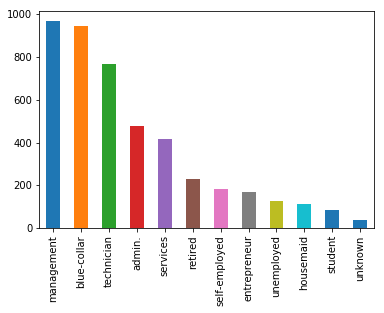

In [14]:
ax = df['job'].value_counts().plot.bar()
fig = ax.get_figure()
fig.savefig('C:\\Users\\amirz\\OneDrive\\Desktop\\New folder\\im1.png')

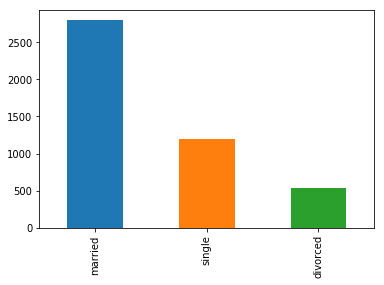

In [15]:
df['marital'].value_counts().plot.bar();
ax = df['marital'].value_counts().plot.bar()
fig = ax.get_figure()
fig.savefig('C:\\Users\\amirz\\OneDrive\\Desktop\\New folder\\im2.png')

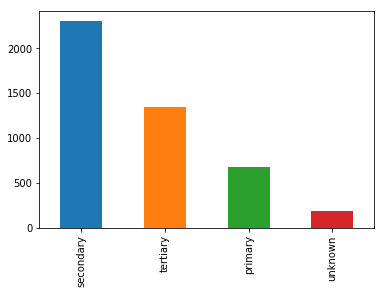

In [16]:
ax = df['education'].value_counts().plot.bar()
fig = ax.get_figure()
fig.savefig('C:\\Users\\amirz\\OneDrive\\Desktop\\New folder\\im3.png')

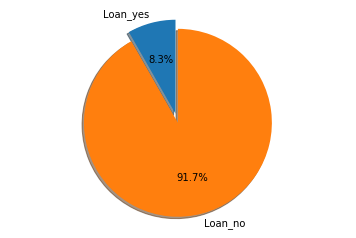

In [19]:
labels = 'Loan_yes', 'Loan_no'
sizes = [43,478]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
plt.savefig('C:\\Users\\amirz\\OneDrive\\Desktop\\New folder\\im4.png')
plt.close()


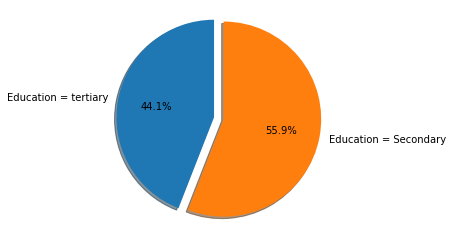

In [20]:
labels = 'Education = tertiary', 'Education = Secondary'
sizes = [193,245]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
plt.savefig('C:\\Users\\amirz\\OneDrive\\Desktop\\New folder\\im5.png')
plt.close()


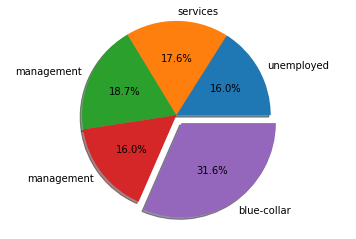

In [21]:
new_df = df.head(5)
explode = (0,0,0,0,0.1)
plt.pie(new_df['age'],explode=explode,labels=new_df['job'],autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.show()
# plt.savefig('C:\\Users\\amirz\\OneDrive\\Desktop\\New folder\\im.png')
# plt.close()

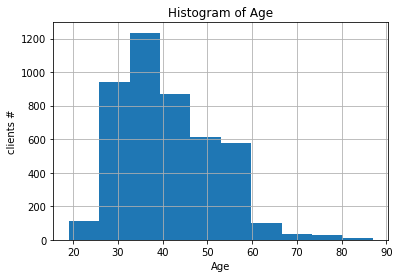

In [23]:
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('clients #')
plt.title('Histogram of Age')
plt.grid(True)
plt.show()
plt.savefig('C:\\Users\\amirz\\OneDrive\\Desktop\\New folder\\im6.png')
plt.close()


In [26]:
sc = StandardScaler()
x = sc.fit_transform(df.iloc[:,:-1])

In [27]:
y = df['y'].values

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [29]:
clfs = [LogisticRegression(),KNeighborsClassifier(n_neighbors=3),\
        KNeighborsClassifier(n_neighbors=5),KNeighborsClassifier(n_neighbors=50),\
       GaussianNB(),SVC(kernel="rbf"),SVC(kernel="rbf")]
for clf in clfs:
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print("===================",clf)
    #print(clf.score(x_test,y_test)*100)
    print(classification_report(y_test,y_pred))

=================== LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.90      0.97      0.93       993
          1       0.53      0.20      0.29       138

avg / total       0.85      0.88      0.86      1131

=================== KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       0.90      0.96      0.93       993
          1       0.47      0.25      0.33       138

avg / total       0.85      0.87      0.86      1131

=================== KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
        

In [30]:
def make_Predicition(features,clf):
    features[0] = int(features[0])
    features[4] = int(features[4])
    features[7] = int(features[7])
    features[8] = int(features[8])
    features[1] = job.transform([features[1]])
    features[2] = marital.transform([features[2]])
    features[3] = education.transform([features[3]])
    features[5] = housing.transform([features[5]])
    features[6] = loan.transform([features[6]])
    scaling = sc.transform(np.array(features).reshape(1,-1))
    return str(dependant.inverse_transform(clf.predict(scaling)[0]))

pred = ['30', 'unemployed', 'married', 'primary', '1787', 'no', 'no', '79', '1']
make_Predicition(pred,clf)

C:\Users\amirz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\amirz\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'no'